In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib notebook
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.svm import SVC 
from sklearn.datasets import load_iris 
df=load_iris()
from seaborn import heatmap 

In [2]:
df

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [3]:
dir(df)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [4]:
df.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [5]:
df.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [6]:
df.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [7]:
iris=pd.DataFrame(df.data , columns=df.feature_names)

In [8]:
iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [9]:
iris["target"]=df.target

In [10]:
iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [11]:
iris["flower _ name"]= iris.target.apply(lambda x : df.target_names [x])

In [12]:
iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower _ name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


# visualization

In [13]:
setosa=iris[iris.target== 0]
versicolor=iris[iris.target== 1]
virginica=iris[iris.target== 2]

<IPython.core.display.Javascript object>


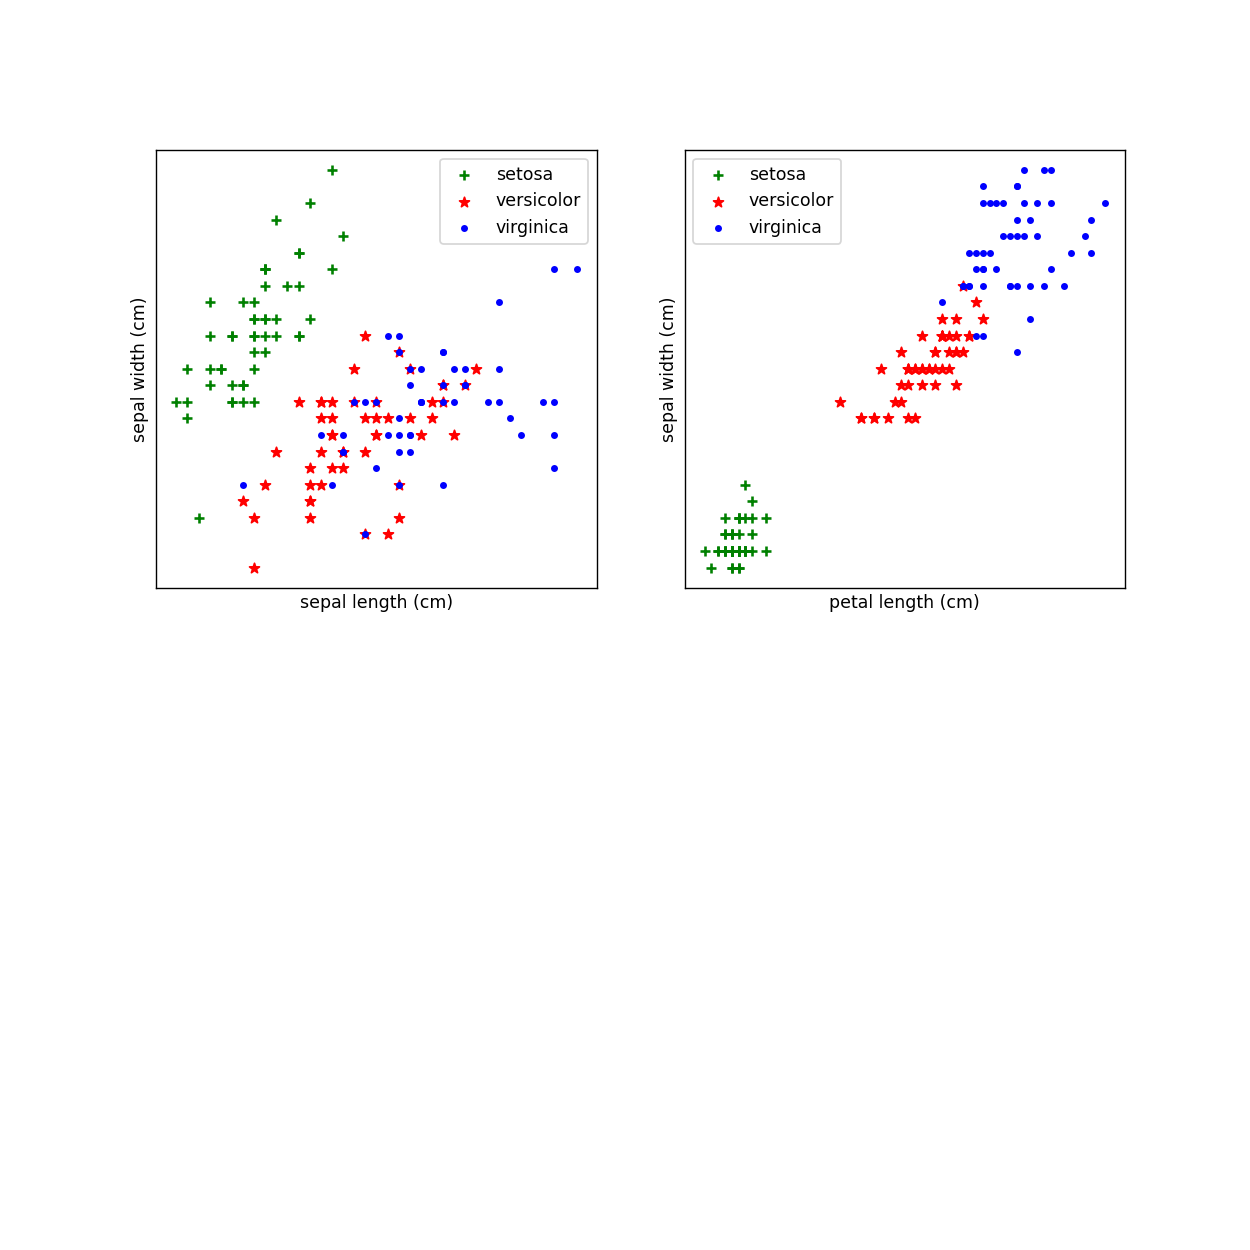

In [14]:

plt.figure(figsize=(10,10))
plt.subplot(2,2,1),
plt.scatter(setosa["sepal length (cm)"],setosa["sepal width (cm)"],c="g",marker="+",label="setosa")
plt.scatter(versicolor["sepal length (cm)"],versicolor["sepal width (cm)"],c="red",marker="*",label="versicolor" )
plt.scatter(virginica["sepal length (cm)"], virginica["sepal width (cm)"],c="blue",marker=".", label="virginica")
plt.xlabel("sepal length (cm)")
plt.ylabel("sepal width (cm)")
plt.xticks([])
plt.yticks([])
plt.legend(loc="best")
plt.show()


plt.subplot(2,2,2),
plt.scatter(setosa["petal length (cm)"],setosa["petal width (cm)"],c="g",marker="+",label="setosa")
plt.scatter(versicolor["petal length (cm)"],versicolor["petal width (cm)"],c="red",marker="*",label="versicolor" )
plt.scatter(virginica["petal length (cm)"], virginica["petal width (cm)"],c="blue",marker=".", label="virginica")
plt.xlabel("petal length (cm)")
plt.ylabel("sepal width (cm)")
plt.xticks([])
plt.yticks([])
plt.legend(loc="best")
plt.show()


# split data to x ,y to enter in  model 


In [15]:
iris.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target', 'flower _ name'],
      dtype='object')

In [16]:
x =iris.drop(["target","flower _ name"] ,axis=1)

In [17]:
y=iris.target

In [18]:
model_1=cross_val_score(LogisticRegression(), x ,y ,cv= 5)


C:\Users\Mohamed\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [19]:
np.average(model_1)

0.9733333333333334

In [20]:
model_2=cross_val_score(DecisionTreeClassifier(),x,y,cv=5)
np.average(model_2)

0.9666666666666668

In [21]:
model_3=cross_val_score(RandomForestClassifier(n_estimators=100),x,y,cv=5)
np.average(model_3)

0.9666666666666668

In [22]:
model_4=cross_val_score(SVC(gamma="auto"),x,y,cv=10)
np.average(model_4)

0.9800000000000001

# the best model is support vector machine

In [23]:
final_model=SVC(gamma="auto")


In [24]:
from sklearn.model_selection import train_test_split 

In [25]:
x_train ,x_test ,y_train ,y_test=train_test_split(x,y ,test_size=0.15)

In [26]:
x_train

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
109,7.2,3.6,6.1,2.5
34,4.9,3.1,1.5,0.2
122,7.7,2.8,6.7,2.0
33,5.5,4.2,1.4,0.2
119,6.0,2.2,5.0,1.5
...,...,...,...,...
116,6.5,3.0,5.5,1.8
87,6.3,2.3,4.4,1.3
1,4.9,3.0,1.4,0.2
45,4.8,3.0,1.4,0.3


In [27]:
y_train

109    2
34     0
122    2
33     0
119    2
      ..
116    2
87     1
1      0
45     0
2      0
Name: target, Length: 127, dtype: int32

In [28]:
final_model.fit(x_train , y_train)

SVC(gamma='auto')

In [29]:
final_model.score(x_train,y_train)

0.9921259842519685

In [30]:
final_model.score(x_test,y_test)

0.9565217391304348

In [31]:
final_model.score(x_test ,y_test)

0.9565217391304348